In [1]:
# Title:     HousePy_Group5_V3
# Authors:   Aline J
# Date:      09/09/19
# Goal:      Analysis of the housing market in the Houston Area per year (2015-2019)
# Questions: 
#Affordable housing

### Begins Here ####
# 1. Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np
import string as string
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import linregress

# 2. Import Raw data file into a data frame
csv_path = "Data/Housepy_raw.csv"
housepyraw_df = pd.read_csv(csv_path)
#housepyraw_df.head()
#housepyraw_df.columns

In [2]:
#3. Subset dataframe: Dropping columns that wont be used to tell us anything
housepy_df = housepyraw_df[["List Price", "Close Price", "Close Date", "Market Area"]]
#housepy_df.head()
#housepy_df.dtypes
# 4. Identify data types 
#housepy_df.dtypes
# 5. Replace $ from column
housepy_df['Close Price'] = housepy_df['Close Price'].apply(lambda x: x.replace("$", ""))
housepy_df['Close Price'] = housepy_df['Close Price'].apply(lambda x: x.replace(",", ""))
housepy_df['Close Price'] = housepy_df['Close Price'].astype(int)

housepy_df['List Price'] = housepy_df['List Price'].apply(lambda x: x.replace("$", ""))
housepy_df['List Price'] = housepy_df['List Price'].apply(lambda x: x.replace(",", ""))
housepy_df['List Price'] = housepy_df['List Price'].astype(int)
housepy_df.head()


,List Price,Close Price,Close Date,Market Area
0,44500,44500,8/3/2015 0:00,Hobby Area
1,65000,60000,8/3/2015 0:00,Hobby Area
2,90000,78500,8/3/2015 0:00,Bear Creek South
3,85900,85000,8/3/2015 0:00,Alief
4,105000,94000,8/3/2015 0:00,Aldine Area


In [3]:
#Drop the rows with the Market Areas with not enough data
housepy_df = housepy_df[housepy_df["Market Area"]!="Other"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Charnwood/Briarbend"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Humble Area West"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Humble Area South"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Gulfton"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Greenway Plaza"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Spring East"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Atascocita North"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Humble Area East"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Pasadena"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Spring/Klein"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Downtown - Houston"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Cypress South"]
housepy_df = housepy_df[housepy_df["Market Area"]!="South Houston"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Webster"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Baytown/Harris County"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Kingwood South"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Alvin North"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Spring/Klein/Tomball"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Sugar Land South"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Sugar Land North"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Friendswood"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Fort Bend County North/Richmond"]
housepy_df = housepy_df[housepy_df["Market Area"]!="Sugar Land West"]

In [4]:
housepy_df.dropna(inplace=True)
#The next two cells are creating 3 columns from splitting one
new = housepy_df["Close Date"].str.split("/", n = 1, expand = True) 
housepy_df["Month"]= new[0] 
housepy_df["DayYear"]= new[1]

new = housepy_df["DayYear"].str.split("/", n = 1, expand = True) 
housepy_df["Day"]= new[0] 
housepy_df["Year"]= new[1]
housepy_df.head()


,List Price,Close Price,Close Date,Market Area,Month,DayYear,Day,Year
0,44500,44500,8/3/2015 0:00,Hobby Area,8,3/2015 0:00,3,2015 0:00
1,65000,60000,8/3/2015 0:00,Hobby Area,8,3/2015 0:00,3,2015 0:00
2,90000,78500,8/3/2015 0:00,Bear Creek South,8,3/2015 0:00,3,2015 0:00
3,85900,85000,8/3/2015 0:00,Alief,8,3/2015 0:00,3,2015 0:00
4,105000,94000,8/3/2015 0:00,Aldine Area,8,3/2015 0:00,3,2015 0:00


In [27]:
new_dict_list = []
for market in housepy_df["Market Area"].unique().tolist():
    temp_dict1 = {"Market Area": housepy_df.loc[housepy_df["Market Area"]==market]["Market Area"].max(), 
                "Sold Price": housepy_df.loc[housepy_df["Market Area"]==market]["Close Price"].median(),
                "Total Sold": len(housepy_df.loc[housepy_df["Market Area"]==market]),
                 #"Affordable Housing Percentage": ((len(housepy_df.loc[(housepy_df["Market Area"]==market)&(housepy_df["Close Price"]<242136)]))
                "Affordable Housing Percentage": ((len(housepy_df.loc[(housepy_df["Market Area"]==market)&(housepy_df["Close Price"]<228000)]))  
                /(len(housepy_df.loc[housepy_df["Market Area"]==market])))*100,
                 "Year": housepy_df.loc[housepy_df["Market Area"]==market]["Year"]} 
    
    new_dict_list.append(temp_dict1)
MarketSummary2 = pd.DataFrame(new_dict_list)
MarketSummary2.head()
summary = MarketSummary2.set_index("Market Area")
summary.head()

,Affordable Housing Percentage,Sold Price,Total Sold,Year
Market Area,,,,
Hobby Area,94.457547,135950.0,1696,0 2015 0:00 1 2015 0:00 75 ...
Bear Creek South,78.176920,180000.0,2227,2 2015 0:00 14 2015 0:00 42 ...
Alief,82.419006,165000.0,2315,3 2015 0:00 66 2015 0:00 89 ...
Aldine Area,98.744159,141500.0,3424,4 2015 0:00 5 2015 0:00 16 ...
Eldridge North,54.932735,215000.0,1338,6 2015 0:00 33 2015 0:00 101 ...


In [31]:
#MoreAffordable = MarketSummary2.set_index("Market Area")
MoreAffordable = MarketSummary2.sort_values("Affordable Housing Percentage", ascending=False)
MA=MoreAffordable.head(5)
MA.head()

LessAffordable = MarketSummary2.sort_values("Affordable Housing Percentage", ascending=True)
LA=LessAffordable.head(5)
LA.head()

merge_table = pd.merge(LA, MA, on="Market Area")
merge_table.head()

,Affordable Housing Percentage_x,Market Area,Sold Price_x,Total Sold_x,Year_x,Affordable Housing Percentage_y,Sold Price_y,Total Sold_y,Year_y


<IPython.core.display.Javascript object>


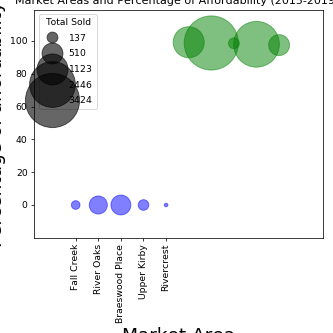

In [25]:
# PandasPlot.set_xticklabels() can be used to set the tick labels as well. It will automatically only take numerical columns.
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

x_axis = LA["Market Area"]
y_axis = LA["Affordable Housing Percentage"]
#size = (More_days_in_Market_df1["percent_change"]*100)
labels = ['Fall Creek', 'River Oaks', 'Braeswood Place', 'Upper Kirby', 'Rivercrest']
total= (LA["Total Sold"])
x_axis1 = MA["Market Area"]
y_axis1 = MA["Affordable Housing Percentage"]
labels1 = ['Hobby Area', 'Bear Creek South', 'Alief', 'Aldine', 'Eldridge']
total1= (MA["Total Sold"])

#size = (More_days_in_Market_df1["percent_change"]*100)

fig, ax = plt.subplots(figsize=(5,5))
scatter1 = ax.scatter(x_axis, y_axis, marker="o", s=total, facecolors="blue", edgecolors="blue", alpha=0.5)
handles1, legend1 = scatter1.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles1, legend1,  loc="lower right", title="Total Sold")

scatter2 = ax.scatter(x_axis1, y_axis1, marker="o", s=total1, facecolors="green", edgecolors="green", alpha=0.5)
handles2, legend2 = scatter2.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles2, legend2,  loc="upper left", title="Total Sold")

plt.xticks(x_axis, labels, rotation='vertical')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.5)
fig.tight_layout()

ax.set_xlabel("Market Area", fontsize=20)
ax.set_ylabel("Percentage of affordability", fontsize=20)
ax.set_title("Market Areas and Percentage of Affordability (2015-2019) ")
plt.savefig("Affordability.png")
plt.show()